 # AI Fall 99 Project 4
 ## Machine Learning

---
By kimia khabiri


## Definition of Question
In this project we are going to predict the price of a house by supervised learning method. 
For this purpose, after gaining sufficient knowledge about the dataset, we pre-process the data and use them to train a model that can make good predictions of house prices according to their features.

## Introduction to dataset
Our database consists of 81 columns and 1460 rows. Apart from the last column, the columns represent the features that can be effective in determining the price of the house. The last column shows the price of each house.
Features in this database are available in both numeric and categorical forms. Categorical features such as house neighbors, type of heating system, foundation, etc., and numerical data such as year of built or garage capacity.

In [982]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!unzip -n "drive/My Drive/Colab Notebooks/house-prices.zip"

Mounted at /content/drive
Archive:  drive/My Drive/Colab Notebooks/house-prices.zip


In [983]:
import pandas as pd
import datetime
from sklearn import feature_selection
import sklearn
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('train.csv', delimiter = ',')
raw_data = data
data

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

## Phase 0: Visualization and EDA
In this phase, we analyze the raw data using the EDA and visualization methods to extract the main features.


#### Part 1
Methods <code>describe()</code> and <code>info()</code> helps us to know more information about data.

Method <code>describe()</code> shows us statistical information for dataset, such as mean or maximum for numerical columns.

Method <code>info()</code> shows us type of each column and number of not null cells in that column.

In [984]:
data.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [985]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Part 2
To calculate the percentage of data lost, we divide the number of NA cells in each column by the size of that column.
In this dataset, the size of the columns is 1460.

In [986]:
missingValuePercantage = data.isna().sum() / 1460 * 100
missingValuePercantage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

#### Part 3
Dependency correlation charts can only be used for numerical features.
Using <code>corr()</code>, the correlation between the features is calculated and a heatmap diagram is plotted for them.

The closer the cell color in the heat map is to white, the more correlated its rows and columns are. For example, the correlation of each feature with itself is 1 and it is white.
Therefore, features that are highly correlated with the price of the house are a good choice for training the model.

In this case *OverallQual*, *GrLivArea*, *GarageArea*, *1stFlrSF* and other light-colored features are a good choice for training model.

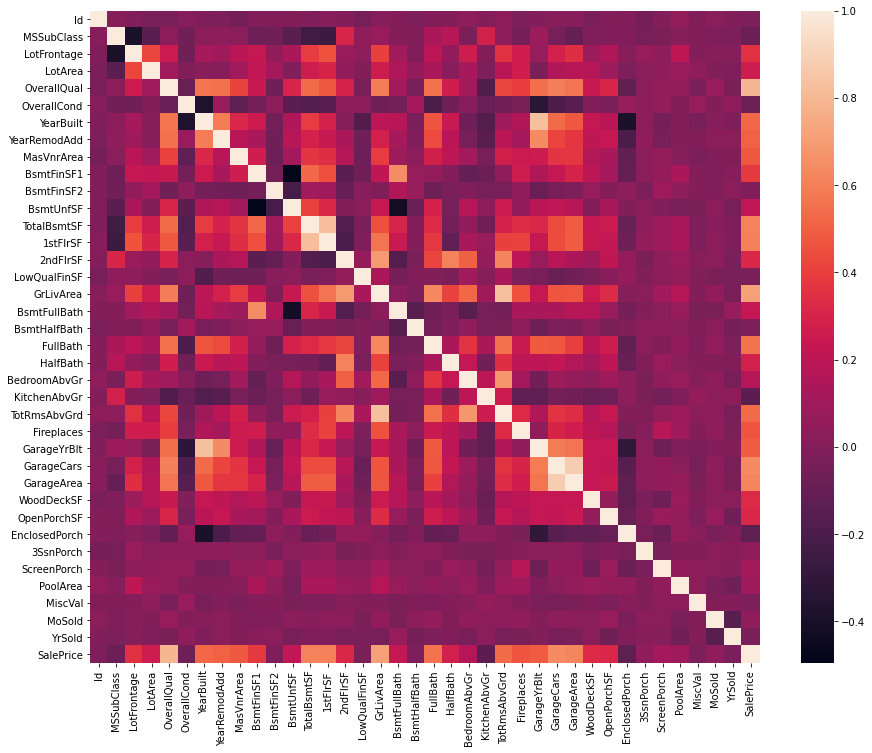

In [987]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,12))
sns.heatmap(data.corr())

#### Part 4
The heatmap chart showes higher contrast for the logarithm of house prices.
This is because the logarithm operation map the actual value of the house to their logarithm which is a smaller value. Therefore, the noise effect is reduced and the correlation effect of the features is more visible.

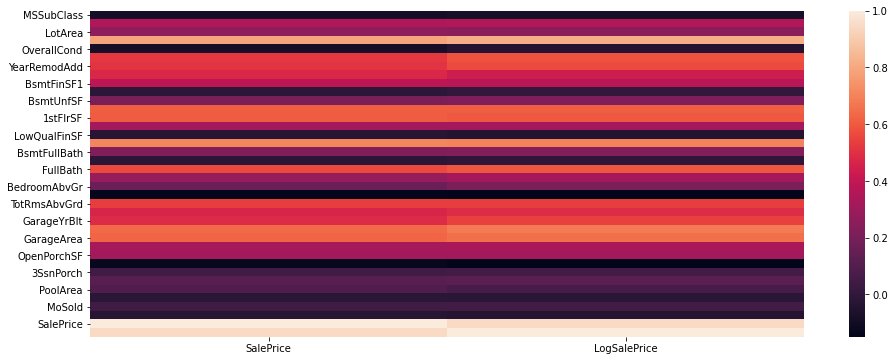

In [988]:
import numpy as np

data['LogSalePrice'] = np.log(data['SalePrice'])
salePriceCorr = data[data.columns[1:]].corr()['SalePrice'][:]
LogSalePriceCorr = data[data.columns[1:]].corr()['LogSalePrice'][:]
saleVsLogSale = pd.concat([pd.DataFrame(salePriceCorr), pd.DataFrame(LogSalePriceCorr)], axis=1, join='inner')
plt.figure(figsize = (16,6))
sns.heatmap(saleVsLogSale)
data.drop(columns=['LogSalePrice'], inplace=True)

#### Part 5
What we did in *Part 3* was not enough to analyze all the features because the evaluations in the previous parts only included numerical features and did not perform analysis on categorical ones.
Therefore, it is necessary to examine these features and the relationship between these features and the price of the house separately.

#### Part 6

The *Scatter plot* is plotted for the 4 features selected in Part 3.
As expected from Heatmap, the shape of these charts contains useful information for training the model. For example, in the OverallQual feature, different amounts of this feature create an almost different price range. Therefore, depending on the amount of this feature, you can have a different prediction of the house price.
The same is true for the other 3 feature plots.

There is another type of plotting called *Hexbin plot*. In the scatter diagram, if the points have common, the density is not clear and they are all marked with the same color. In hexbin plot, the density of points in dense parts can also be understood. The following is a Hexbin diagram for the 4 selected features in Part 3.

Scatter plot: A Scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded, one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis

Hexabin plot: A Hexbin plot is useful to represent the relationship of 2 numerical variables when you have a lot of data point. Instead of overlapping, the plotting window is split in several hexbins, and the number of points per hexbin is counted. The color denotes this number of points.




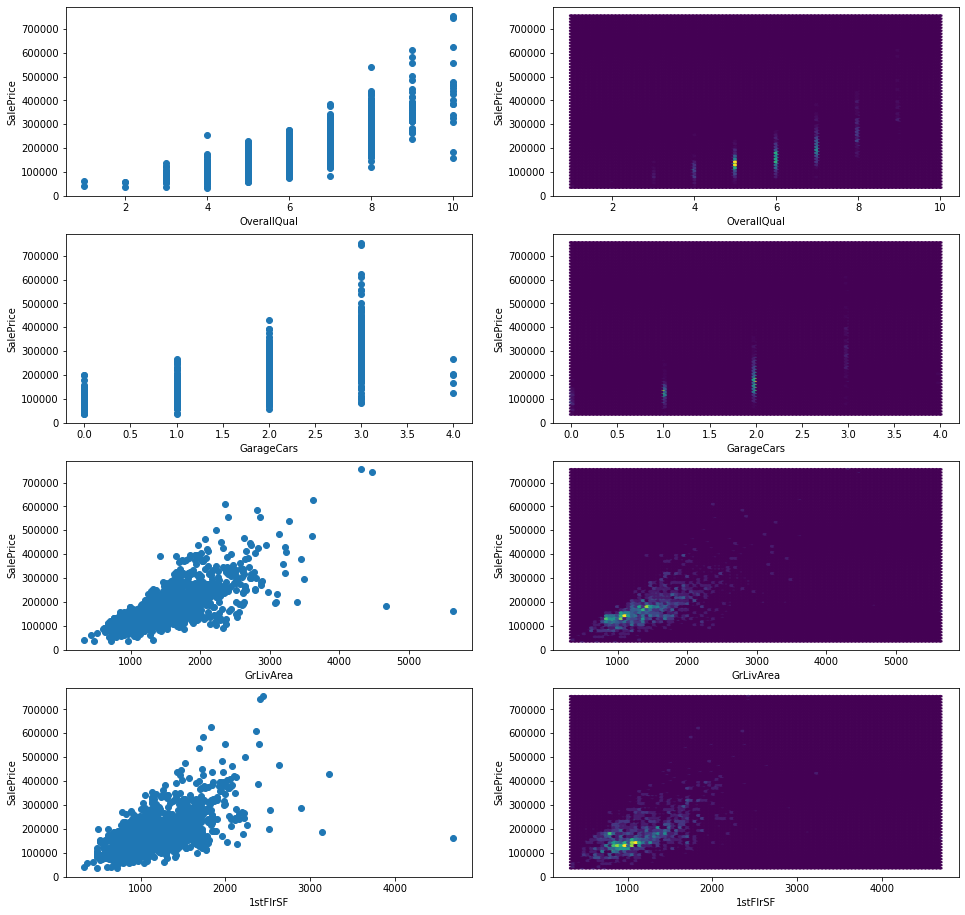

In [989]:
fig = plt.figure(figsize = (16,16))

ax1 = fig.add_subplot(421)
ax1.set_xlabel('OverallQual')
ax1.set_ylabel('SalePrice')
ax1.scatter(data['OverallQual'], data['SalePrice'])
ax2 = fig.add_subplot(422)
ax2.set_xlabel('OverallQual')
ax2.set_ylabel('SalePrice')
ax2.hexbin(data['OverallQual'], data['SalePrice'])

ax3 = fig.add_subplot(423)
ax3.set_xlabel('GarageCars')
ax3.set_ylabel('SalePrice')
ax3.scatter(data['GarageCars'], data['SalePrice'])
ax4 = fig.add_subplot(424)
ax4.set_xlabel('GarageCars')
ax4.set_ylabel('SalePrice')
ax4.hexbin(data['GarageCars'], data['SalePrice'])

ax5 = fig.add_subplot(425)
ax5.set_xlabel('GrLivArea')
ax5.set_ylabel('SalePrice')
ax5.scatter(data['GrLivArea'], data['SalePrice'])
ax6 = fig.add_subplot(426)
ax6.set_xlabel('GrLivArea')
ax6.set_ylabel('SalePrice')
ax6.hexbin(data['GrLivArea'], data['SalePrice'])

ax7 = fig.add_subplot(427)
ax7.set_xlabel('1stFlrSF')
ax7.set_ylabel('SalePrice')
ax7.scatter(data['1stFlrSF'], data['SalePrice'])
ax8 = fig.add_subplot(428)
ax8.set_xlabel('1stFlrSF')
ax8.set_ylabel('SalePrice')
ax8.hexbin(data['1stFlrSF'], data['SalePrice'])

plt.show()

#### Part 7
I used the <code>sns.catplot</code> to select the appropriate categorical features. For this purpose, I drew a chart for the features that I think had a good correlation with the house price, and if the chart matched my guess, I considered that feature as the main feature.

For example, the plot below, which shows a relationship between the price of a house and its neighborhoods, is a good feature for model training. Because different neighborhoods have different price ranges for the house and these intervals have relatively little in common. Therefore, according to the neighbors of a house, an estimate of its approximate price can be obtained.

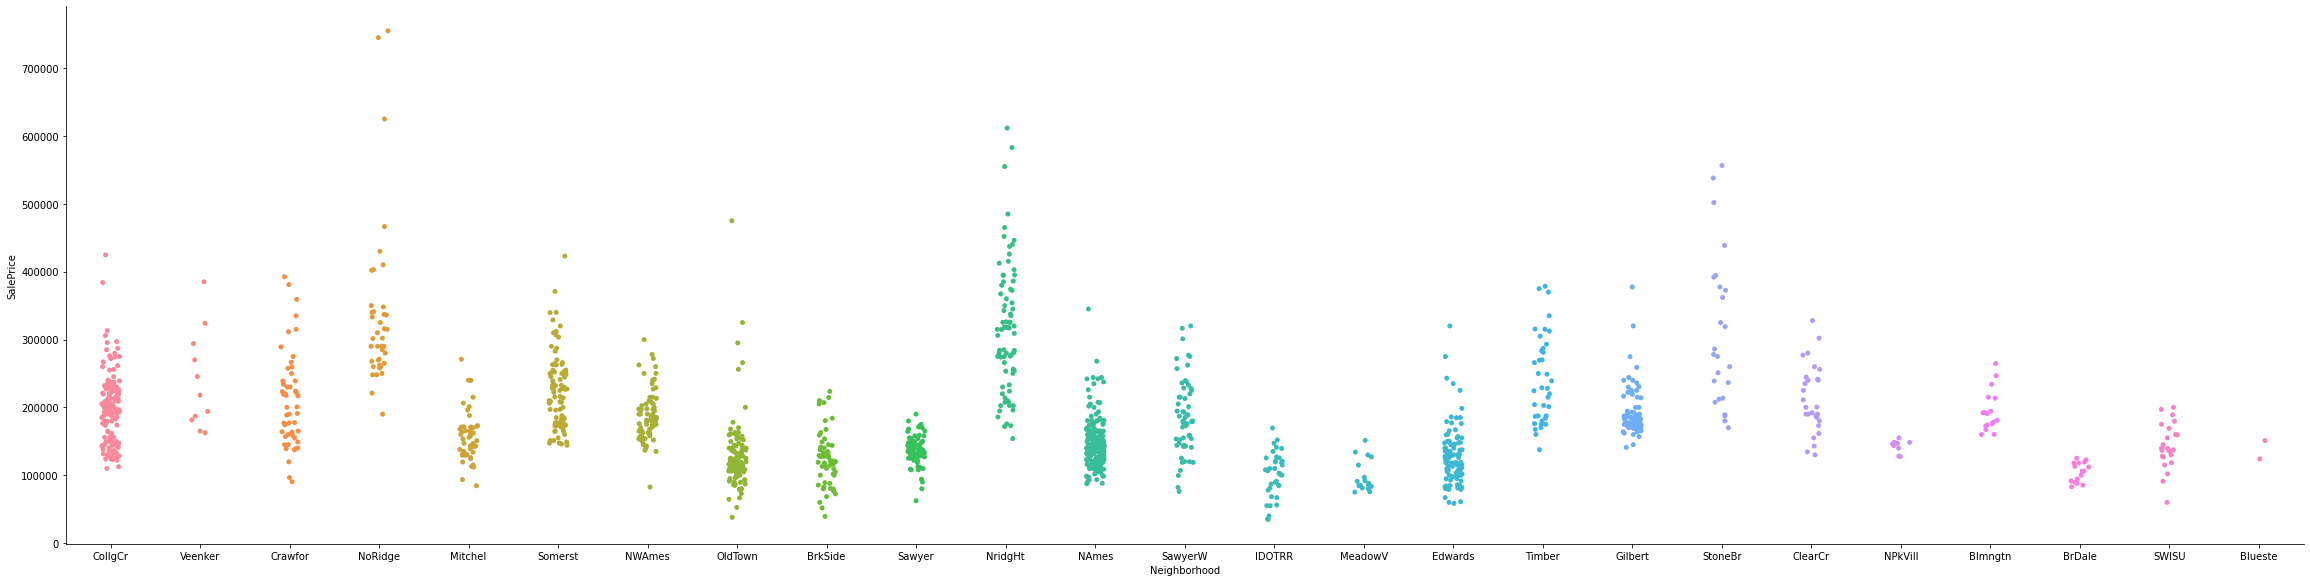

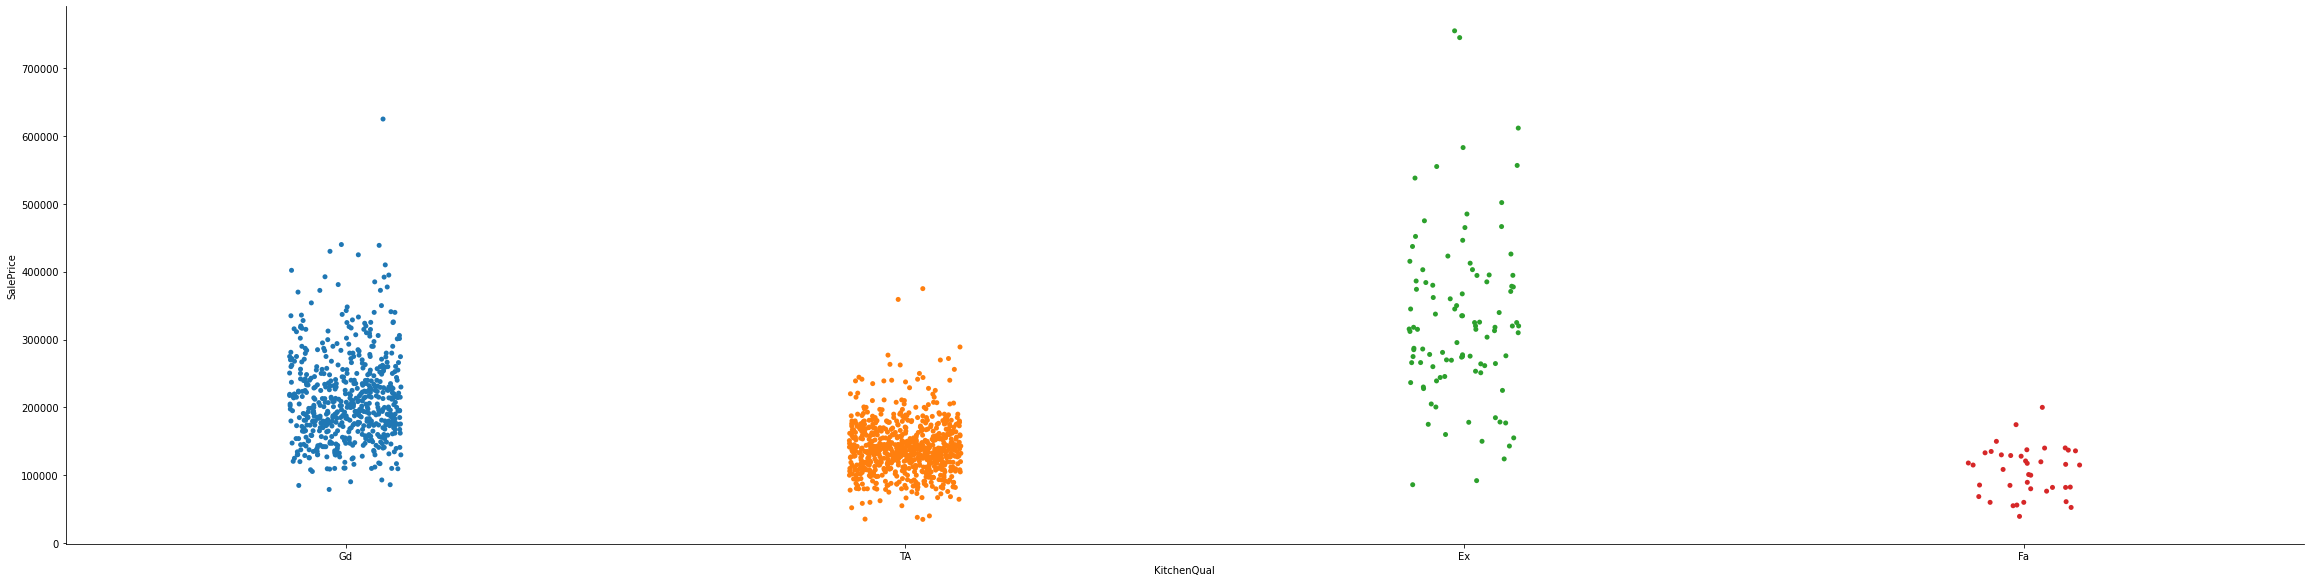

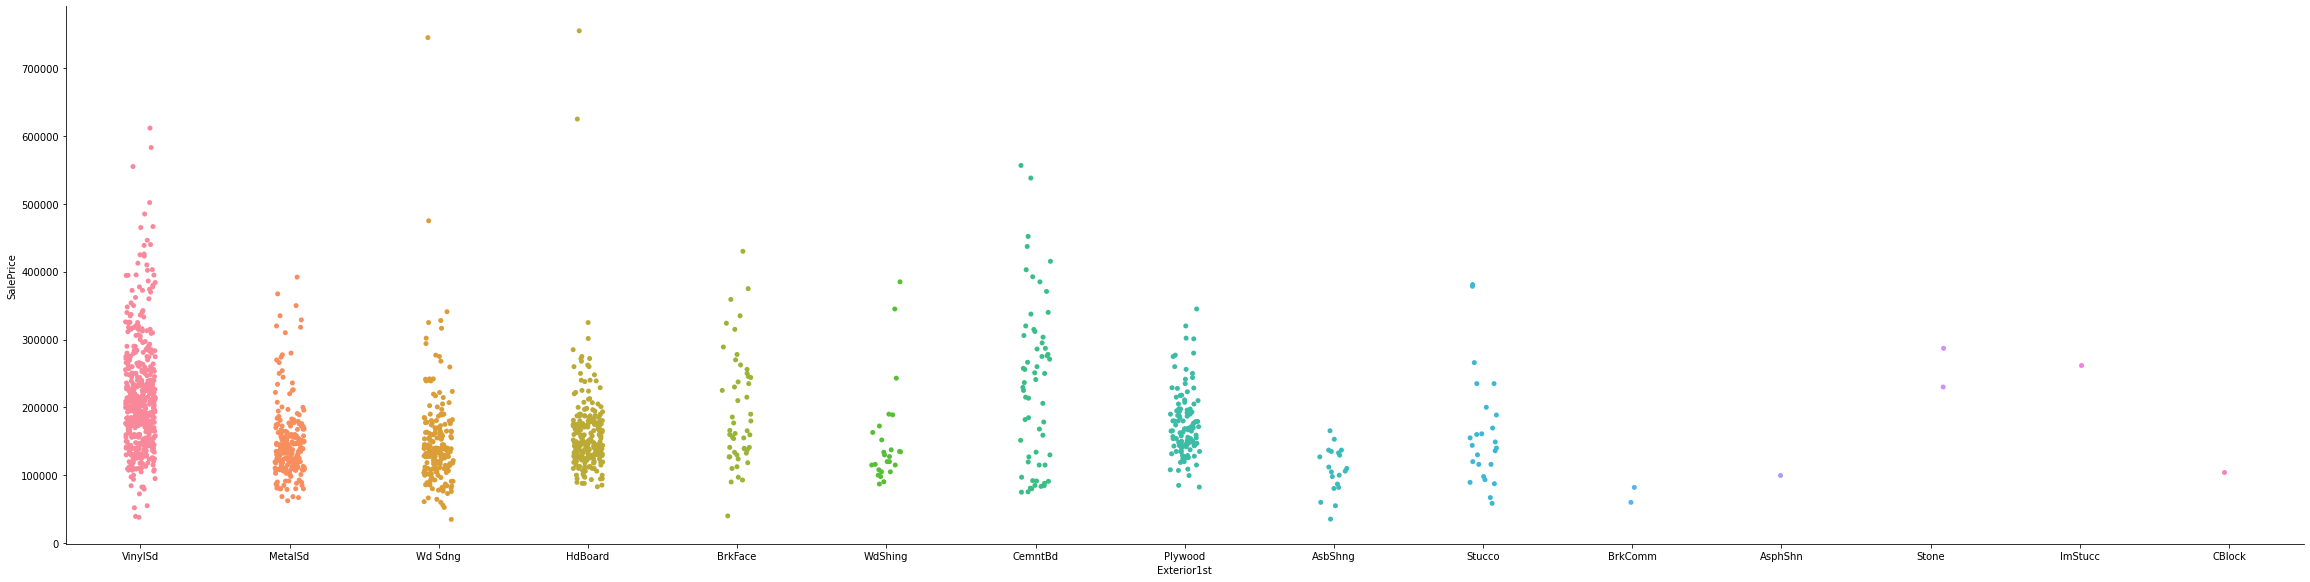

In [990]:
sns.catplot(x="Neighborhood", y="SalePrice", data=data, height=8, aspect=20/5)
sns.catplot(x="KitchenQual", y="SalePrice", data=data, height=8, aspect=20/5)
sns.catplot(x="Exterior1st", y="SalePrice", data=data, height=8, aspect=20/5)




---




## Phase 1: Pre-ProcessingProcessing

### Part 1
There are other methods for handling lost data, some of them are discussed below and compared with the two main methods.

#### Assigning An Unique Category
This means assigning a new defined category to all data that has a value of nan to distinguish it from the categories that previously existed in the feature. In this method, there will be no more null data because a new category has been assigned to all null values. However, this means adding a new feature to the model, resulting in lower performance.

#### Using Algorithms Which Support Missing Values
KNN is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. While the algorithm is applied, KNN considers the missing values by taking the majority of the K nearest values. It is very time consuming process and it can be critical in data mining where large databases are being extracted however it does not require creation of a predictive model for each attribute with missing data in the dataset.


### Part 2
Features with a high percentage of lost data should not be omitted. Because it is possible that although there is a small amount of that feature, but it has a positive effect on lowering the price and in situations where it is not null, it has a direct relationship with the rise or fall of the price.
However, in this project, features that have a large percentage of lost data have been deleted.

In [991]:
missingValuePercantage.sort_values(ascending=False).head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
dtype: float64

In [992]:
data.drop(columns=['Alley'], inplace=True)
missingValuePercantage = data.isna().sum() / 1460 * 100
missingValuePercantage.sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
RoofMatl         0.000000
RoofStyle        0.000000
dtype: float64

Further analysis have been performed for data that do not have a high percentage of lost data.
For numerical features, the correlation calculated in Part 3 is one of the parameters of this decision, and if the feature does not have a large correlation with the target column, it is removed.
For categorical features, the evaluation is based on the shape of their correlation diagram (before filling in the null values).
Also, the null values of the numeric features we keep are filled with the median, and the null values of the categorical features we keep are filled with the maximum repetition.

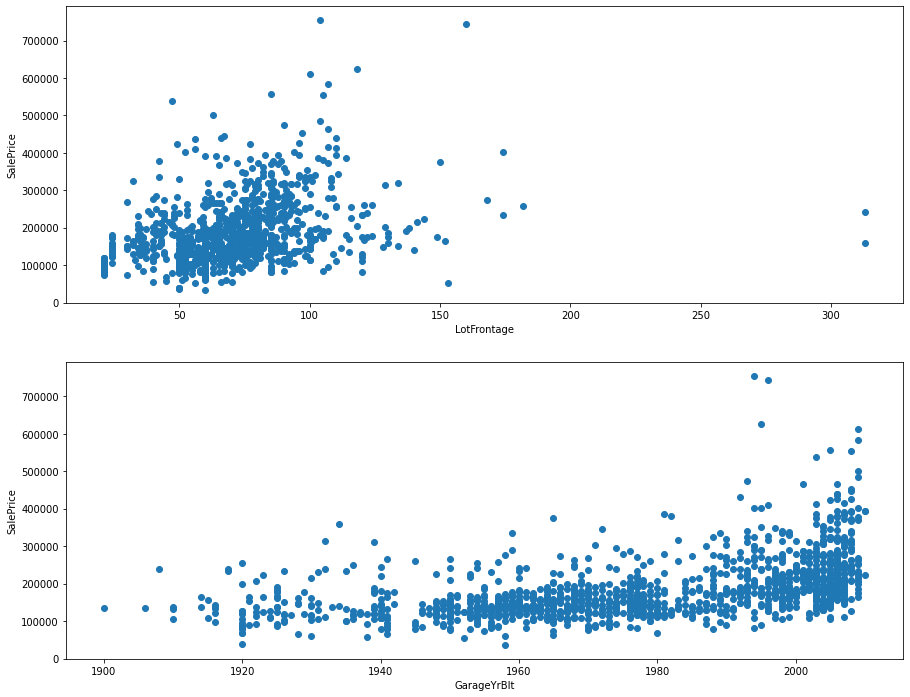

In [993]:
fig = plt.figure(figsize = (15,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_xlabel('LotFrontage')
ax1.set_ylabel('SalePrice')
ax1.scatter(data['LotFrontage'], data['SalePrice'])
ax2.set_xlabel('GarageYrBlt')
ax2.set_ylabel('SalePrice')
ax2.scatter(data['GarageYrBlt'], data['SalePrice'])

In [994]:
# sns.catplot(x="GarageFinish", y="SalePrice", data=data)
# sns.catplot(x="GarageType", y="SalePrice", data=data)
# sns.catplot(x="GarageCond", y="SalePrice", data=data) #drop
# sns.catplot(x="GarageQual", y="SalePrice", data=data) #drop
# sns.catplot(x="BsmtExposure", y="SalePrice", data=data) #drop
# sns.catplot(x="BsmtFinType1", y="SalePrice", data=data)
# sns.catplot(x="BsmtFinType2", y="SalePrice", data=data) #drop
# sns.catplot(x="BsmtCond", y="SalePrice", data=data)
# sns.catplot(x="BsmtQual", y="SalePrice", data=data)

In [995]:
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)

data['FireplaceQu'].fillna('No', inplace=True)
data['MiscFeature'].fillna('No', inplace=True)
data['Fence'].fillna('No', inplace=True)
data['PoolQC'].fillna('No', inplace=True)
data['GarageCond'].fillna('No', inplace=True)
data['GarageType'].fillna('No', inplace=True)

data = data.fillna(data.mode().iloc[0])

salePriceCorr = data[data.columns[1:]].corr()['SalePrice'][:]

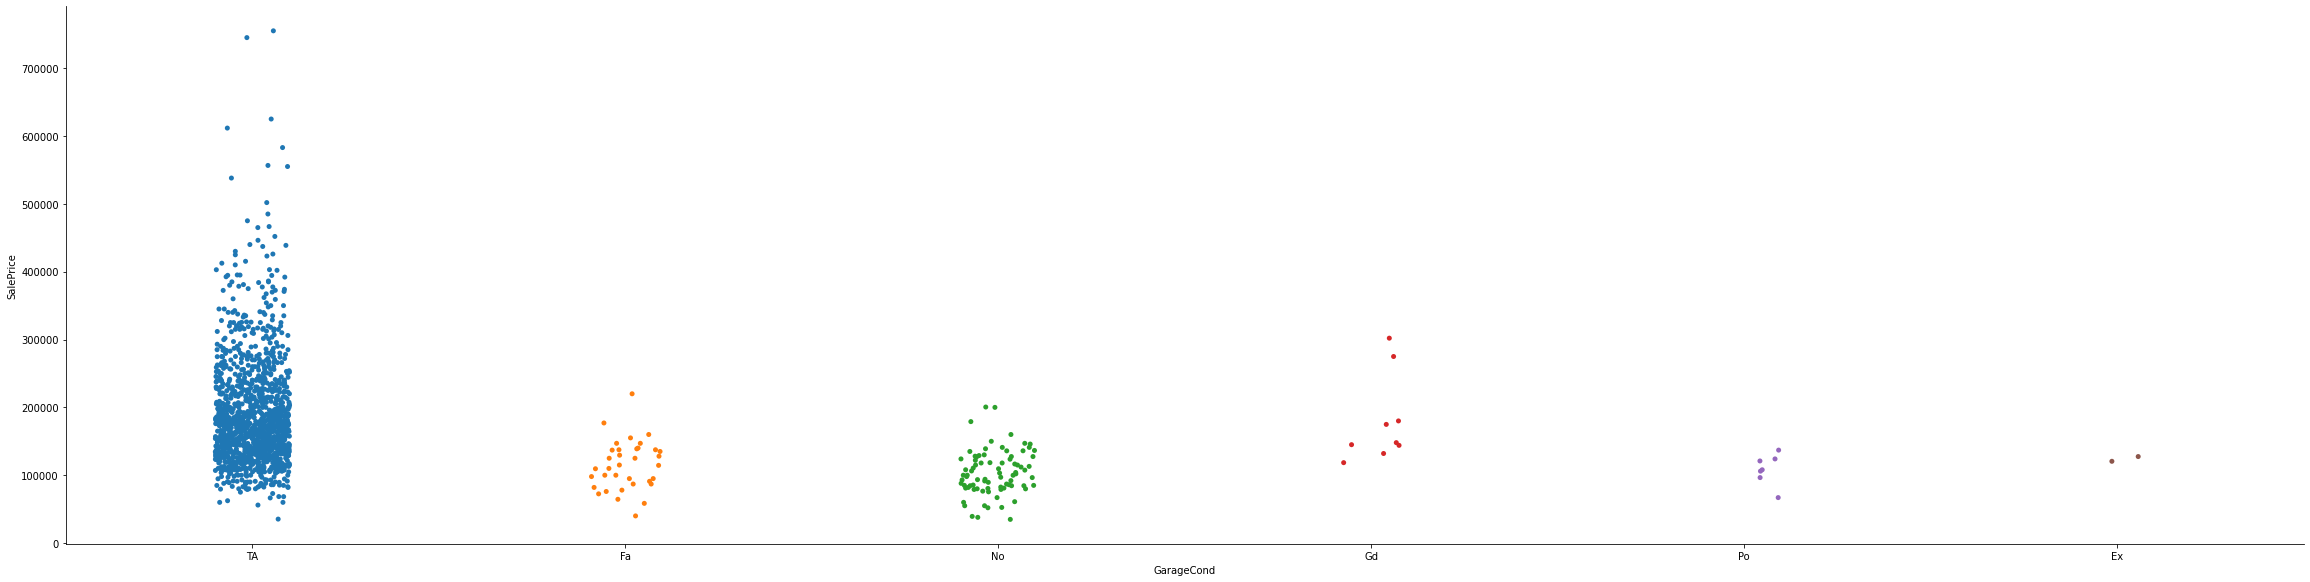

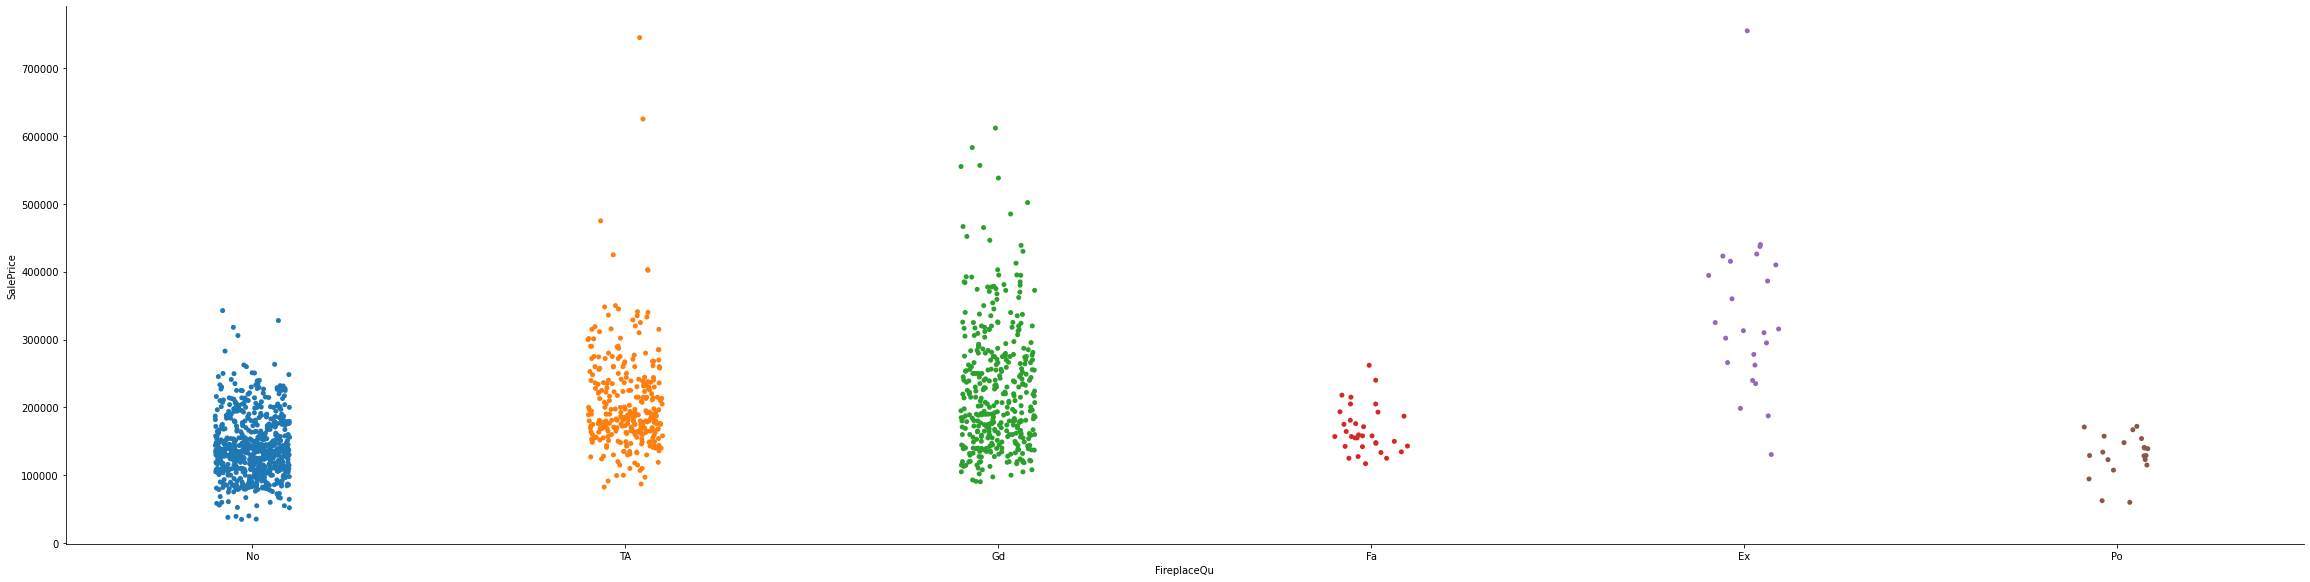

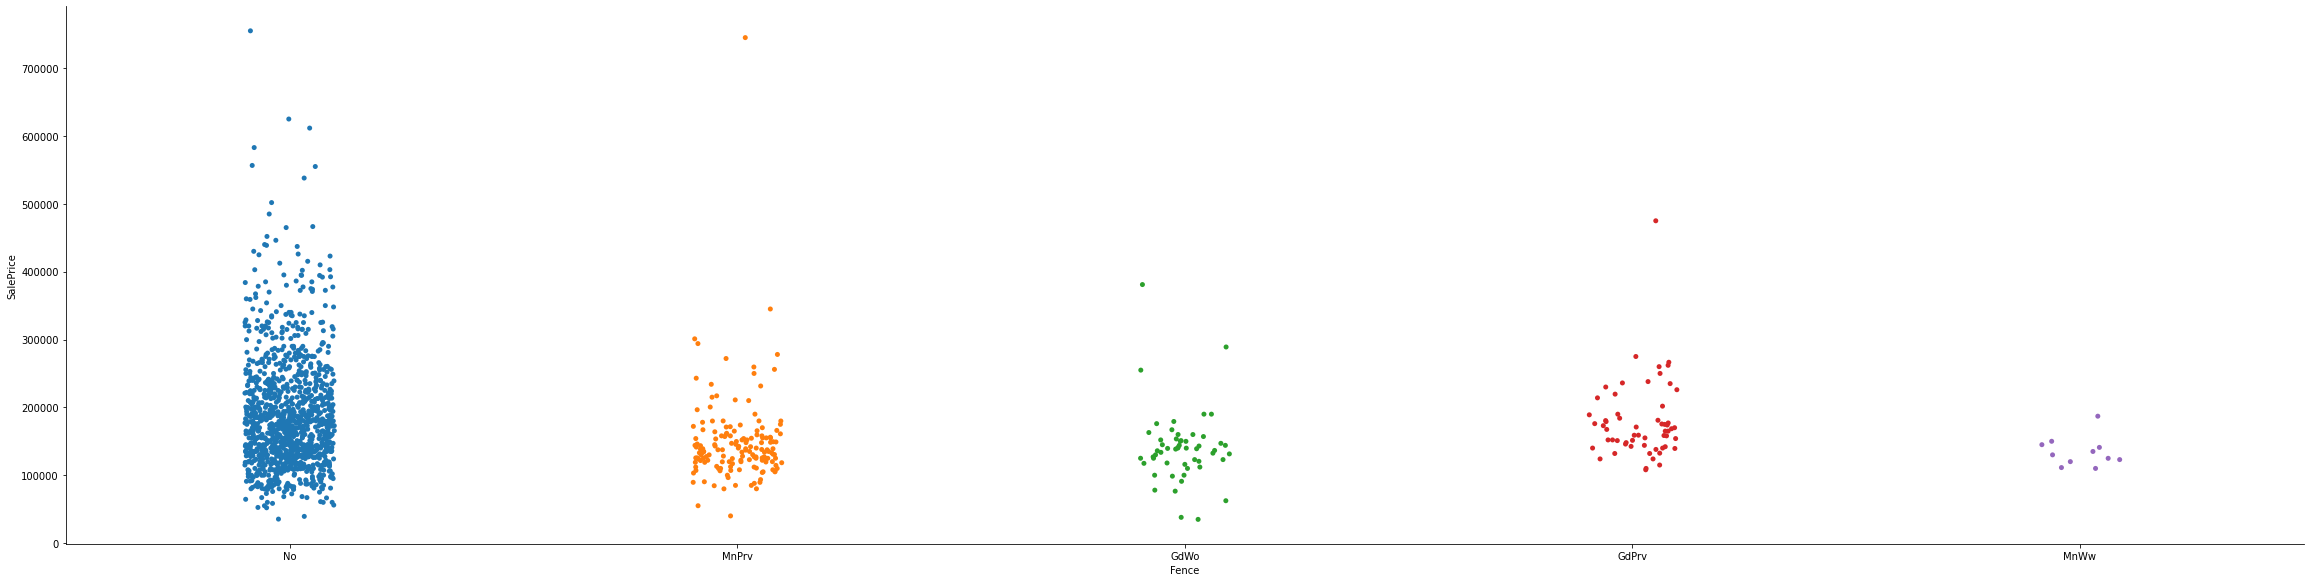

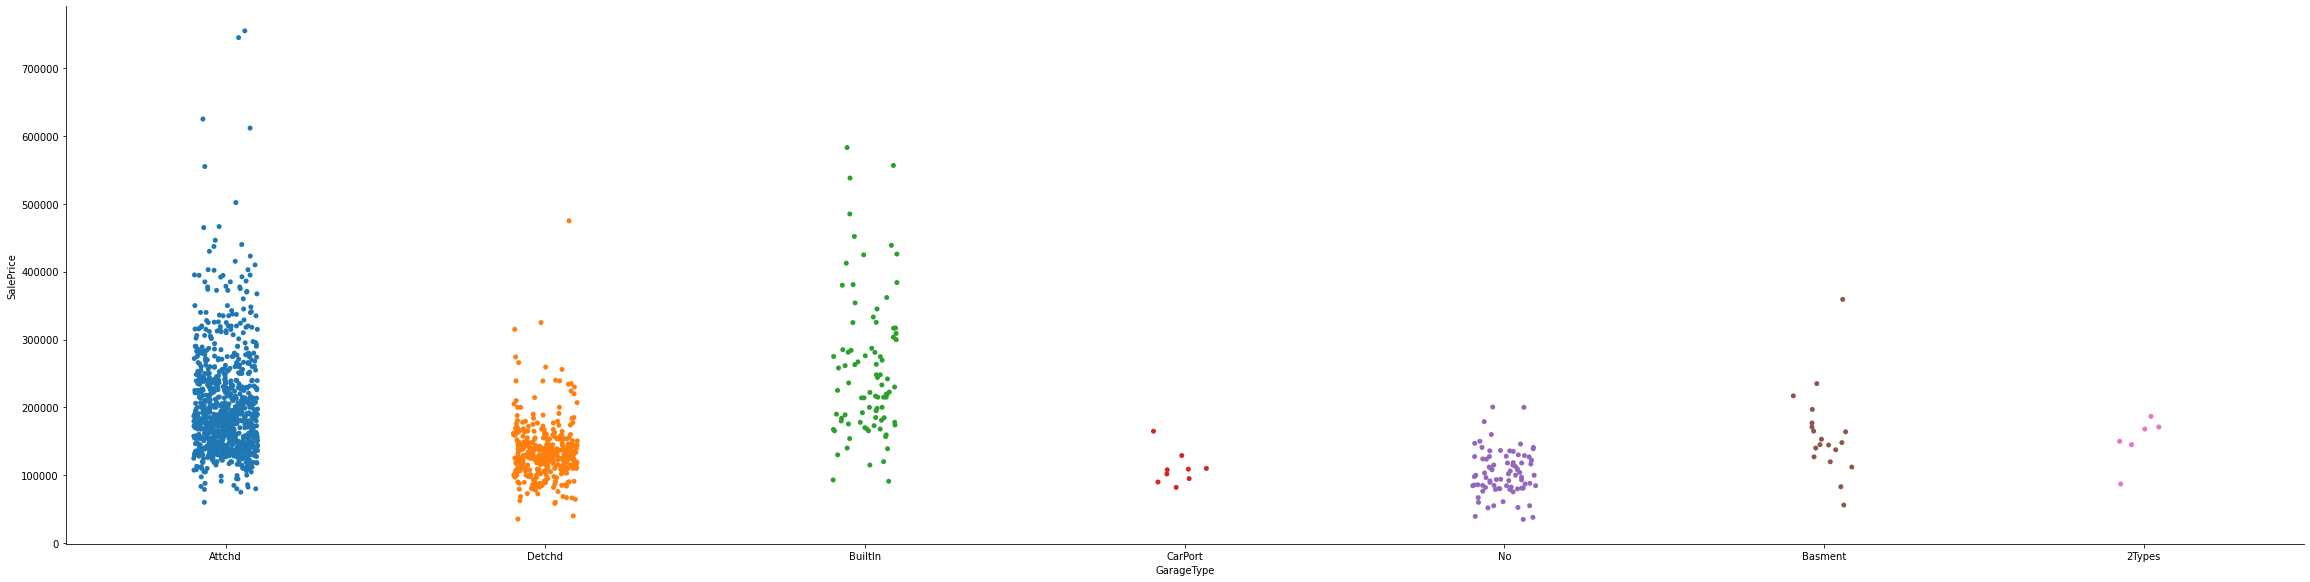

In [996]:
sns.catplot(x="GarageCond", y="SalePrice", data=data, height=8, aspect=20/5)
sns.catplot(x="FireplaceQu", y="SalePrice", data=data, height=8, aspect=20/5)
sns.catplot(x="Fence", y="SalePrice", data=data, height=8, aspect=20/5)
sns.catplot(x="GarageType", y="SalePrice", data=data, height=8, aspect=20/5)

In [997]:
missingValuePercantage = data.isna().sum() / 1460 * 100
missingValuePercantage.sort_values(ascending=False).head(10)

SalePrice        0.0
SaleCondition    0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
dtype: float64

### Part 3
The terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1.
The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different range so normalization is needed for our dataset. 

In [998]:
df_num = data.iloc[:,0:-2].select_dtypes(include=[np.number])
df_norm = (df_num - df_num.mean()) / (df_num.max() - df_num.min())
data[df_norm.columns] = df_norm
data

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0    -0.500000    0.018251       RL  ...        WD         Normal    208500
1    -0.499315   -0.217043       RL  ...        WD         Normal    181500
2    -0.498629    0.018251       RL  ...        WD         Normal    223500
3    -0.497944    0.077075       RL  ...        WD        Abnorml    140000
4    -0.497258    0.018251       RL  ...        WD         Normal    250000
...        ...         ...      ...  ...       ...            ...       ...
1455  0.497258    0.018251       RL  ...        WD         Normal    175000
1456  0.497944   -0.217043       RL  ...        WD         Normal    210000
1457  0.498629    0.077075       RL  ...        WD         Normal    266500
1458  0.499315   -0.217043       RL  ...        WD         Normal    142125
1459  0.500000   -0.217043       RL  ...        WD         Normal    147500

[1460 rows x 80 columns]

### Part 4
#### Ordinal Encoding
In ordinal encoding, each unique category value is assigned an integer value. This is called an ordinal encoding or an integer encoding and is easily reversible.
For some variables, an ordinal encoding may be enough. The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.
#### One-Hot Encoding
For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst. Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).
In this case, a one-hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.

It is better to handle all the categorized features in one way. This makes our model uniform. 


In [999]:
categoricalMainFeatures = ['Neighborhood', 'Exterior1st', 'BsmtQual', 'FireplaceQu', 'GarageType']
data.drop(data.select_dtypes(include=[object]).columns.difference(categoricalMainFeatures), 1, inplace=True)
data

Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
0    -0.500000    0.018251    -0.016657  ... -0.392902  0.046062     208500
1    -0.499315   -0.217043     0.034713  ... -0.120174 -0.203938     181500
2    -0.498629    0.018251    -0.006383  ...  0.243462  0.046062     223500
3    -0.497944    0.077075    -0.033780  ... -0.392902 -0.453938     140000
4    -0.497258    0.018251     0.048412  ...  0.516189  0.046062     250000
...        ...         ...          ...  ...       ...       ...        ...
1455  0.497258    0.018251    -0.026930  ...  0.152553 -0.203938     175000
1456  0.497944   -0.217043     0.051837  ... -0.392902  0.546062     210000
1457  0.498629    0.077075    -0.013232  ... -0.120174  0.546062     266500
1458  0.499315   -0.217043    -0.006383  ... -0.211083  0.546062     142125
1459  0.500000   -0.217043     0.017590  ... -0.029265  0.046062     147500

[1460 rows x 43 columns]

In [1000]:
onehot = pd.get_dummies(data['Neighborhood'][:], prefix='neighborhood_')
for feature in categoricalMainFeatures[1:]:
  onehot = pd.concat([onehot,  pd.get_dummies(data[feature][:], prefix=feature+'_')], axis=1, join='inner')
# kitchen_onehot = pd.get_dummies(data['KitchenQual'][:], prefix='kitchen_')
# exterior_onehot = pd.get_dummies(data['Exterior1st'][:], prefix='exterior_')

### Part 5
Not all columns need to be kept and columns that are less correlated with the target column can be removed because these columns do not help much in our evaluation and prediction of the target column.

In [1001]:
to_drop = [index for index, value in salePriceCorr.items() if abs(value) < 0.13]
data.drop(columns=to_drop + categoricalMainFeatures, inplace=True)
data = pd.concat([data, onehot], axis=1, join='inner')
data

Id  LotFrontage  ...  GarageType__Detchd  GarageType__No
0    -0.500000    -0.016657  ...                   0               0
1    -0.499315     0.034713  ...                   0               0
2    -0.498629    -0.006383  ...                   0               0
3    -0.497944    -0.033780  ...                   1               0
4    -0.497258     0.048412  ...                   0               0
...        ...          ...  ...                 ...             ...
1455  0.497258    -0.026930  ...                   0               0
1456  0.497944     0.051837  ...                   0               0
1457  0.498629    -0.013232  ...                   0               0
1458  0.499315    -0.006383  ...                   0               0
1459  0.500000     0.017590  ...                   0               0

[1460 rows x 83 columns]

### Part 6
It is best that the size of test data be something between 0.15 and 0.35 of the size of training data so that overfitting does not occur and at the same time the model is sufficiently trained.
Alternatively, test data and train data can be randomly selected from the dataset. This method works better than the previous method because the data may have been collected in a specific order in the dataset, but with this method the similarity between the data is lost and there is more variety in the test data and the most.

In [1002]:
from sklearn.model_selection import train_test_split

trainData, testData, trainAns, testAns = train_test_split(data.drop(columns=['SalePrice']), data['SalePrice'], test_size=0.32, random_state = 17)
print(trainData)
print(testData)

            Id  LotFrontage  ...  GarageType__Detchd  GarageType__No
545  -0.126456    -0.002958  ...                   0               0
1360  0.432145    -0.064602  ...                   0               0
1195  0.319054    -0.064602  ...                   0               0
564  -0.113434    -0.002958  ...                   0               0
721  -0.005826    -0.002958  ...                   0               0
...        ...          ...  ...                 ...             ...
406  -0.221727    -0.064602  ...                   1               0
1414  0.469157    -0.020081  ...                   1               0
143  -0.401988     0.027864  ...                   0               0
1265  0.367032    -0.119396  ...                   1               0
623  -0.072995    -0.002958  ...                   1               0

[992 rows x 82 columns]
            Id  LotFrontage  ...  GarageType__Detchd  GarageType__No
703  -0.018163     0.021015  ...                   1               0
1361  0.4



---



## Phase 2: Model Training, Evaluatian and Hyperparameter Tuning

### Decision tree

Overfitting occurs when our performance on training data is very good but we can not make good predictions for test data.
This can be seen in the plot in such a way that we have a small error in the training part but a large error in the test part. For example, in this part, from some depth onwards, overfitting has occurred.
Underfitting occurs when our model does not work well on test data or the train data. For example, in the shallow depths of the desicion tree, underfitting has occurred.

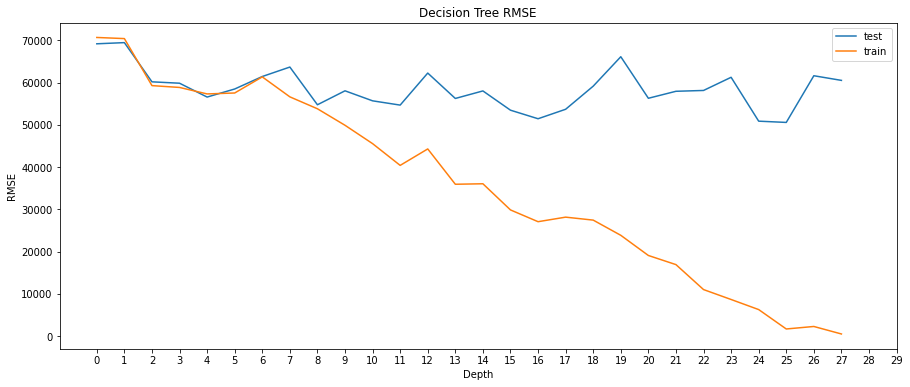

In [1003]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt

testRMSEs = []
trainRMSEs = []
for i in range(2, 30):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc = dtc.fit(trainData, trainAns)
    dtcPrediction = dtc.predict(testData)
    testRMSEs.append(sqrt(metrics.mean_squared_error(testAns, dtcPrediction)))
    
    dtcPrediction = dtc.predict(trainData)
    trainRMSEs.append(sqrt(metrics.mean_squared_error(trainAns, dtcPrediction)))
    
plt.figure(figsize=(15,6))
plt.plot(testRMSEs, label='test')
plt.plot(trainRMSEs, label='train')
plt.xticks(np.arange(30))
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.title('Decision Tree RMSE')
plt.legend()
plt.show()

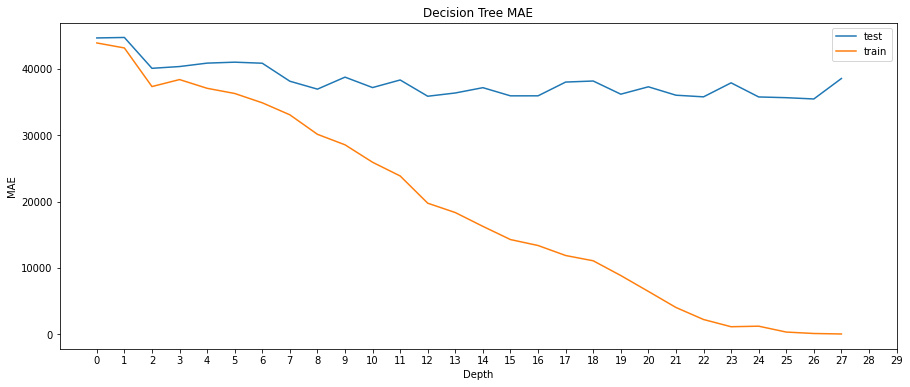

In [1004]:
testMAEs = []
trainMAEs = []
for i in range(2, 30):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc = dtc.fit(trainData, trainAns)
    dtcPrediction = dtc.predict(testData)
    testMAEs.append(metrics.mean_absolute_error(testAns, dtcPrediction))
    
    dtcPrediction = dtc.predict(trainData)
    trainMAEs.append(metrics.mean_absolute_error(trainAns, dtcPrediction))
    
plt.figure(figsize=(15,6))
plt.plot(testMAEs, label='test')
plt.plot(trainMAEs, label='train')
plt.xticks(np.arange(30))
plt.xlabel('Depth')
plt.ylabel('MAE')
plt.title('Decision Tree MAE')
plt.legend()
plt.show()

In [1005]:
dtc = DecisionTreeClassifier(max_depth=testMAEs.index(min(testMAEs))+1)
dtc = dtc.fit(trainData, trainAns)
dtcPrediction = dtc.predict(testData)
print('RMSE: ', sqrt(metrics.mean_squared_error(testAns, dtcPrediction)))
print('MAE:  ', metrics.mean_absolute_error(testAns, dtcPrediction))

RMSE:  63684.80803017109
MAE:   39703.33974358974


In [1006]:
from sklearn.tree import DecisionTreeRegressor

dtRegressor = DecisionTreeRegressor(max_depth=testMAEs.index(min(testMAEs))+1)

### K-Nearest-Neighbours
As can be seen, overfitting in knn occurs when few neighbors are considered for calculations. This is because the model has a limited view of data and therefore does not work well for data that is different from training data.

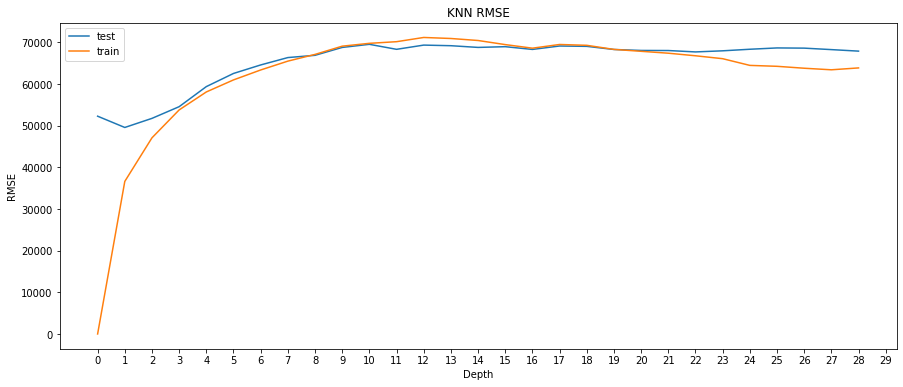

In [1007]:
from sklearn.neighbors import KNeighborsClassifier

testRMSEs = []
trainRMSEs = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(trainData, trainAns)
    knnPrediction = knn.predict(testData)
    testRMSEs.append(sqrt(metrics.mean_squared_error(testAns, knnPrediction)))
    
    knnPredictions = knn.predict(trainData)
    trainRMSEs.append(sqrt(metrics.mean_squared_error(trainAns, knnPredictions)))
    
plt.figure(figsize=(15,6))
plt.plot(testRMSEs, label='test')
plt.plot(trainRMSEs, label='train')
plt.xticks(np.arange(30))
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.title('KNN RMSE')
plt.legend()
plt.show()

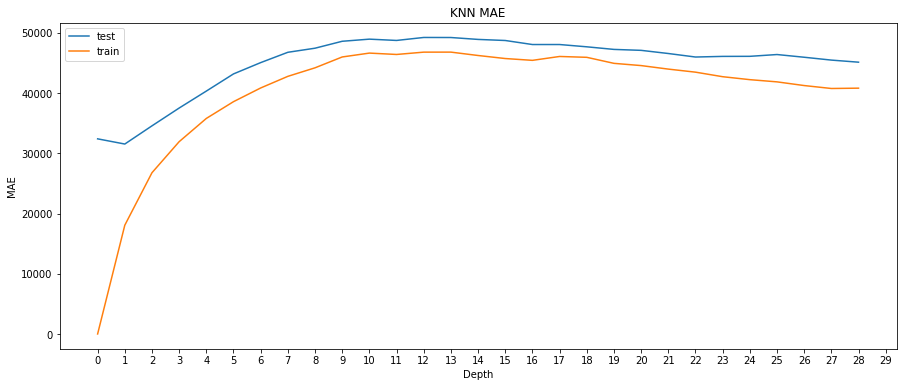

In [1008]:
testMAEs = []
trainMAEs = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(trainData, trainAns)
    knnPrediction = knn.predict(testData)
    testMAEs.append(metrics.mean_absolute_error(testAns, knnPrediction))
    
    knnPredictions = knn.predict(trainData)
    trainMAEs.append(metrics.mean_absolute_error(trainAns, knnPredictions))
    
plt.figure(figsize=(15,6))
plt.plot(testMAEs, label='test')
plt.plot(trainMAEs, label='train')
plt.xticks(np.arange(30))
plt.xlabel('Depth')
plt.ylabel('MAE')
plt.title('KNN MAE')
plt.legend()
plt.show()

In [1009]:
knn = KNeighborsClassifier(n_neighbors=testMAEs.index(min(testMAEs))+1)
knn = knn.fit(trainData, trainAns)
knnPrediction = knn.predict(testData)
print('RMSE: ', sqrt(metrics.mean_squared_error(testAns, knnPrediction)))
print('MAE:  ', metrics.mean_absolute_error(testAns, knnPrediction))

RMSE:  49582.85640399802
MAE:   31544.70512820513


In [1010]:
from sklearn.neighbors import KNeighborsRegressor

knnRegressor = KNeighborsRegressor(n_neighbors=testMAEs.index(min(testMAEs))+1)

### Linear Regression
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. In our case, linear regression is working really good.

In [1011]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression().fit(trainData,trainAns)
linRegPrediction = linReg.predict(testData)
print('RMSE: ', sqrt(metrics.mean_squared_error(testAns, linRegPrediction)))
print('MAE:  ', metrics.mean_absolute_error(testAns, linRegPrediction))

RMSE:  29572.238829462203
MAE:   19973.1047008547


## Phase 3: Ensemble Methods

### Part 1: Random Forest
Random Forests are an improvement over bagged decision trees. A problem with decision trees is that they are greedy. They choose which variable to split on using a greedy algorithm that minimizes error. As such, even with Bagging, the decision trees can have a lot of structural similarities and in turn have high correlation in their predictions. Combining predictions from multiple models in ensembles works better if the predictions from the sub-models are uncorrelated or at best weakly correlated. Random forest changes the algorithm for the way that the sub-trees are learned so that the resulting predictions from all of the sub-trees have less correlation.
The hyper parameters used in this model are:

1- Depth: The maximum depth of the tree.

2- N Estimators: The number of trees in the forest.

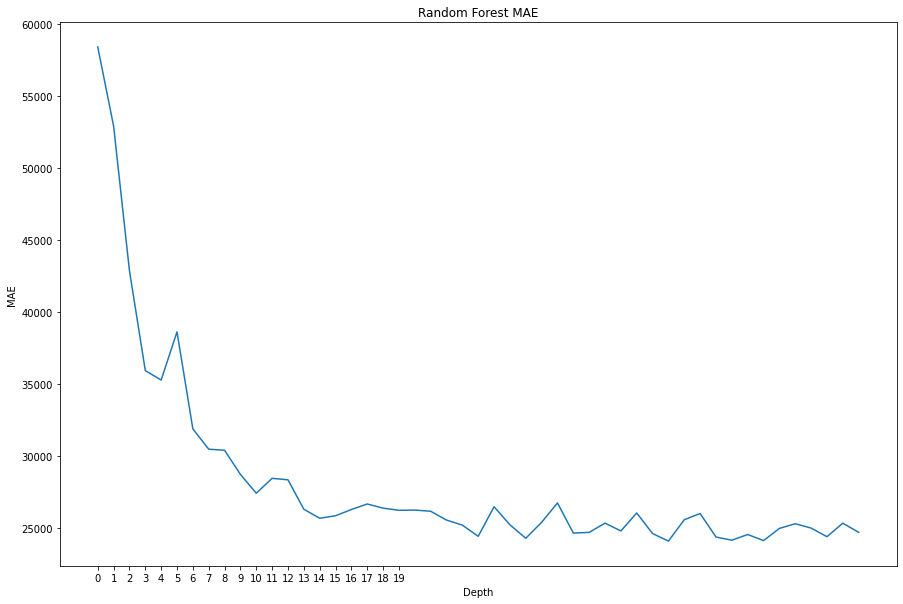

In [1012]:
from sklearn.ensemble import RandomForestClassifier

depthMAEs = []
for i in range(1, 50):
    rfc = RandomForestClassifier(max_depth=i).fit(trainData, trainAns)
    rfcPrediction = rfc.predict(testData)
    depthMAEs.append(metrics.mean_absolute_error(testAns, rfcPrediction))
        
plt.figure(figsize=(15,10))
plt.plot(depthMAEs)
plt.xticks(np.arange(20))
plt.xlabel('Depth')
plt.ylabel('MAE')
plt.title('Random Forest MAE')
plt.show()

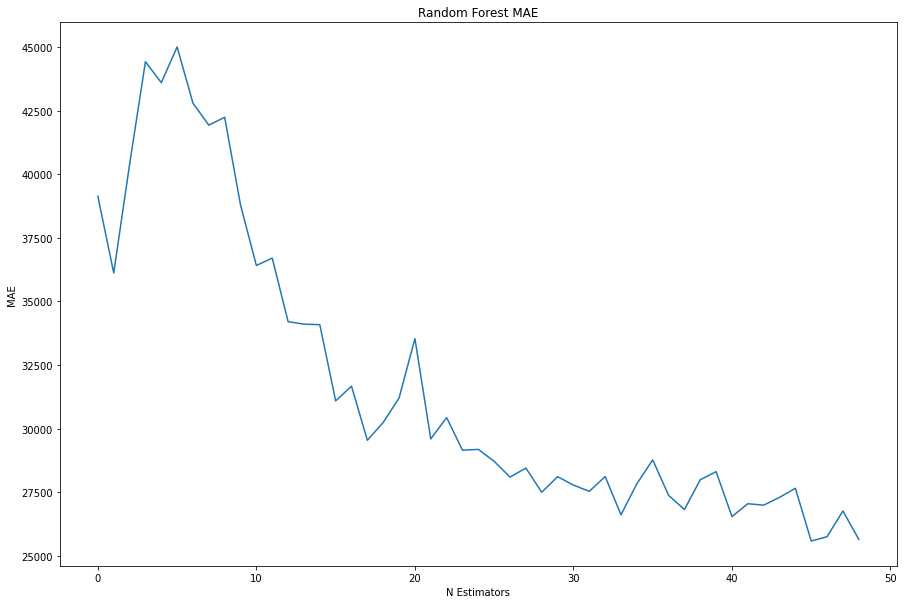

In [1013]:
estimatorMAEs = []
for i in range(1, 50):
    rfc = RandomForestClassifier(max_depth=depthMAEs.index(min(depthMAEs))+1, n_estimators=i).fit(trainData, trainAns)
    rfcPrediction = rfc.predict(testData)
    estimatorMAEs.append(metrics.mean_absolute_error(testAns, rfcPrediction))
        
plt.figure(figsize=(15,10))
plt.plot(estimatorMAEs)
plt.xlabel('N Estimators')
plt.ylabel('MAE')
plt.title('Random Forest MAE')
plt.show()

In [1014]:
rfc = RandomForestClassifier(max_depth=depthMAEs.index(min(depthMAEs))+1, n_estimators=estimatorMAEs.index(min(estimatorMAEs))+1).fit(trainData, trainAns)
rfcPrediction = rfc.predict(testData)
print('RMSE: ', sqrt(metrics.mean_squared_error(testAns, rfcPrediction)))
print('MAE:  ', metrics.mean_absolute_error(testAns, rfcPrediction))

RMSE:  41756.21186238227
MAE:   25831.596153846152


### Part 2: Voting Regression
The VotingClassifier takes in a list of different estimators as arguments and a voting method. The hard voting method uses the predicted labels and a majority rules system, while the soft voting method predicts a label based on the argmax/largest predicted value of the sum of the predicted probabilities.
A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction. In our case, decision tree, KNN and linear regression are used as estimators.

In [1015]:
from sklearn.ensemble import VotingRegressor

linearRegressor = LinearRegression()
voting = VotingRegressor([('dtc', dtRegressor), ('knn', knnRegressor), ('linReg', linearRegressor)]).fit(trainData, trainAns)
votingPrediction = voting.predict(testData)
print('RMSE: ', sqrt(metrics.mean_squared_error(testAns, votingPrediction)))
print('MAE:  ', metrics.mean_absolute_error(testAns, votingPrediction))

RMSE:  32284.300402176556
MAE:   20584.837606837606


### Part 3
In our case, vote regression fails. This is because vote regression averages the output of the models. This ensemble method will be suitable if the performance and prediction of the models are close to each other. But in case there is a big difference between the output of linear model and other methods, so vote regression fails.